Saving 00436515-870c-4b36-a041-de91049b9ab4_sam2_masked.png to 00436515-870c-4b36-a041-de91049b9ab4_sam2_masked.png
Alpha channel detected. Converting to grayscale.


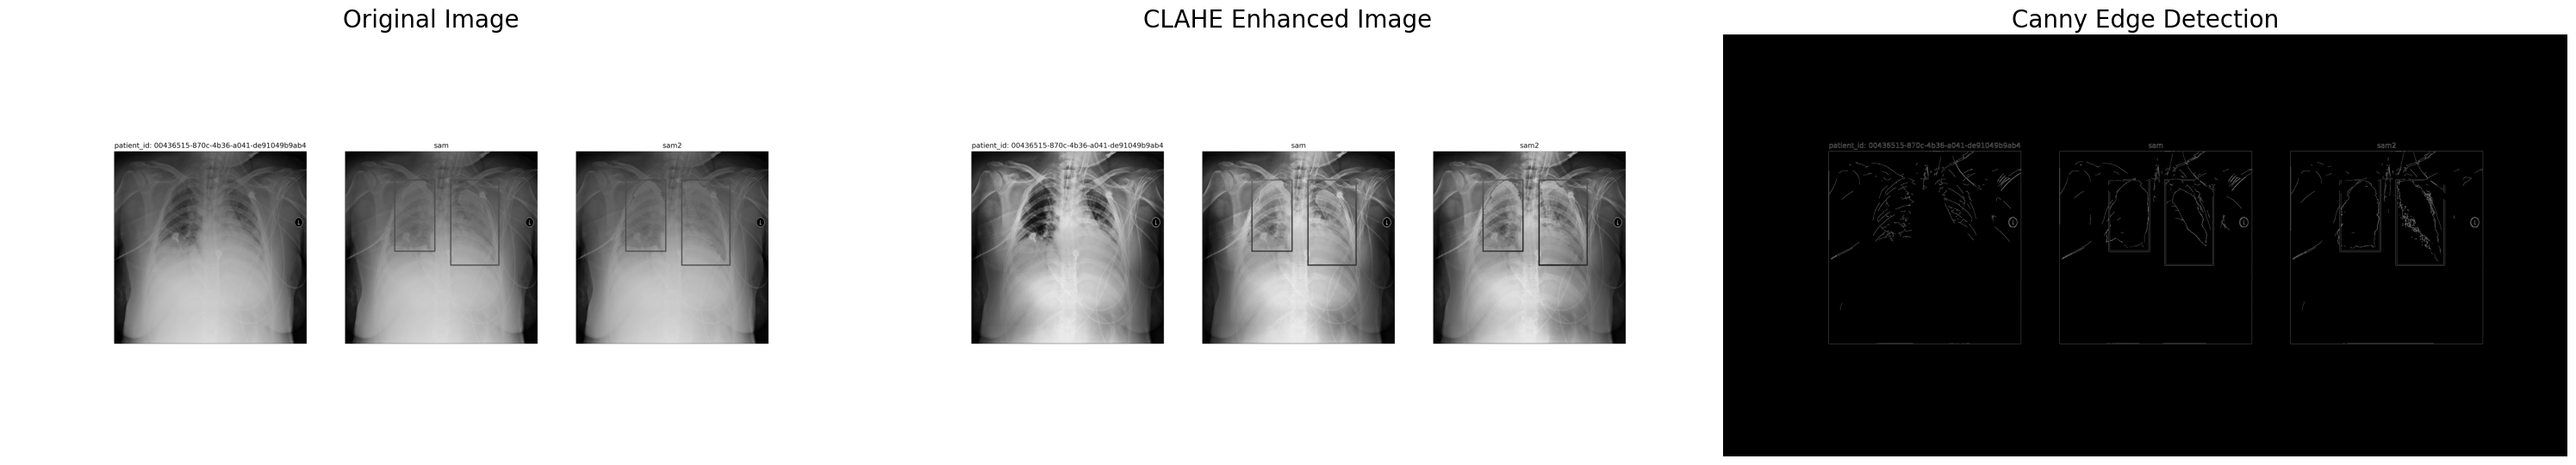

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image from your PC
uploaded = files.upload()

# Step 2: Retrieve the filename of the uploaded image
image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Step 3: Load the uploaded image
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Load the image with all channels

# Step 4: Check for Alpha Channel and Convert to Grayscale if necessary
if len(image.shape) == 3 and image.shape[2] == 4:
    # If the image has an alpha channel, convert to grayscale
    print("Alpha channel detected. Converting to grayscale.")
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
elif len(image.shape) == 3:
    # If the image has no alpha channel but is colored, convert to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 5: Convert the image to the appropriate data type if necessary
if image.dtype != 'uint8':
    image = image.astype(np.uint8)

# Step 6: Apply CLAHE with higher clipLimit to increase contrast more aggressively
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))  # Increased clipLimit to 5.0 for more contrast
clahe_image = clahe.apply(image)

# Step 7: Apply Canny Edge Detection with optimized thresholds
edges = cv2.Canny(clahe_image, threshold1=80, threshold2=180)  # Increase lower threshold to 80, upper to 180

# Step 8: Display the Original, CLAHE-enhanced, and Edge-detected Images with larger display size
plt.figure(figsize=(30, 12))  # Increase the figure size for larger display

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image", fontsize=20)  # Increase font size for better readability
plt.imshow(image, cmap='gray')
plt.axis('off')

# CLAHE Image
plt.subplot(1, 3, 2)
plt.title("CLAHE Enhanced Image", fontsize=20)
plt.imshow(clahe_image, cmap='gray')
plt.axis('off')

# Canny Edges Image
plt.subplot(1, 3, 3)
plt.title("Canny Edge Detection", fontsize=20)
plt.imshow(edges, cmap='gray')
plt.axis('off')

# Show all images
plt.tight_layout()  # Reduce padding between subplots
plt.show()
